### Introduction

This tutorial will introduce you to the basics of audio data processing and genre classification using Neural Networks and python. Audio data analysis is about analyzing and understanding audio signals captured by digital devices. The field is a growing subdomain of deep learning applications. Some of the most popular and widespread machine learning systems, virtual assistants Alexa, Siri, and Google Home, are built on models that can extract information from audio signals. Further, there are numerous applications of audio analysis in the enterprise, healthcare, productivity, and smart cities. Examples include customer satisfaction analysis from customer support calls, media content analysis and retrieval, medical diagnostic aids and patient monitoring, assistive technologies for people with hearing impairments, and audio analysis for public safety.

#### Tutorial Content

In this tutorial, we will show how to do some audio data analysis and genre classification in Python, specifically using Librosa. 

We will cover the following topics in this tutorial:

* Installing the Libraries 
* Introduction to Audio File
* Introduction to Librosa
* Introduction to Spectrogram
* Introduction to Feature Selection
* Example: Music Genre Classification Using an Artifical Neural Network Model
* Conclusion and References

### Installing the Libraries

Before getting started, you'll need to install the various libraries that we will use using `conda`:

    $ conda install -c conda-forge librosa
    $ conda install pandas
    $ conda install numpy
    $ conda install matplotlib
    $ conda install sklearn
    $ conda install tensorflow

After successfully installing the libraries, load the cell below to load them into the notebook. Note that we don't need to install csv and os because they are included in the standard Python modules. 

In [55]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers
import csv
import os

### Introduction to Audio File
Sound is represented in the form of an audio signal. We interact with audio data everyday, sometimes unconsciouly, including conversation with others, music, background noises, etc. These unstructured data may convey very useful information. For example, when talking with someone, you will not only get what he/she says but also what the person is feeling at the moment. 

There are devices built which help us capture these sounds and represent it in computer readable format. Some of the example formats are:

* wav (Waveform Audio File) format
* mp3 (MPEG-1 Audio Layer 3) format
* WMA (Windows Media Audio) format

#### How to characterize and digitize audio data

Audio data may be characterized by parameters including frequency, bandwidth, nominal level, voltage level, and decibels, which can reveal important information for analysis. Typical audio signals are wave-like data, represented as an **amplitude** of audio change with respect to **time**. Aduio data are digitzed by sampling them at discrete intervals, known as the **sampling rate**. For example, an sampling rate of 22050Hz means that the samples are taken 22050 times per second. 

### Introduction to Librosa

Librosa is a python package used for analyzing music and audio signals. It is very intuitive and well documented with tons of examples and tutorials. 

In order to analyze audio data and perform feature extraction , we need to first convert it to an audio time series. With librosa, we can do this very easily using the `librosa.load` method. It returns two values, `x` and `sr`. 
* `x` is a numpy array that represents an audio time series. 
* `sr` is an integer representing the sampling rate (in Hz) of `x`. 

Run the below cell to see how it works.

In [4]:
# Load an audio file
audio = "pop.00000.wav"
x, sr = librosa.load(audio)
print(x, type(x))
print(sr, type(sr))

[-0.0887146  -0.09524536 -0.10275269 ...  0.04016113  0.03860474
  0.02639771] <class 'numpy.ndarray'>
22050 <class 'int'>


The sampling rate is defaulted to 22050 Hz. We can change this by adding a second parameter `sr`, as shown below.

In [5]:
# Load an audio file and set the sampling rate to 44100 Hz
audio = "pop.00000.wav"
x, sr = librosa.load(audio, sr=44100)
print(x, type(x))
print(sr, type(sr))

[-0.08693509 -0.1039058  -0.09691031 ...  0.02878346  0.01786033
  0.01615444] <class 'numpy.ndarray'>
44100 <class 'int'>


We can also tell librosa to load a specific duration of the audio file by adding an additional parameter `duration`, as shown below. 

In [6]:
# Load the first 10 seconds of an audio file
audio = "pop.00000.wav"
x, sr = librosa.load(audio, duration=10)
print(x, type(x))
print(sr, type(sr))

[-0.0887146  -0.09524536 -0.10275269 ... -0.12792969 -0.07669067
 -0.05203247] <class 'numpy.ndarray'>
22050 <class 'int'>


### Introduction to Spectrogram

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. It is often shown as a heat map. We can see where there is more or less energy and how energy levels vary over time.

Run the below cell to plot a spectrogram of a song under the pop genre. 

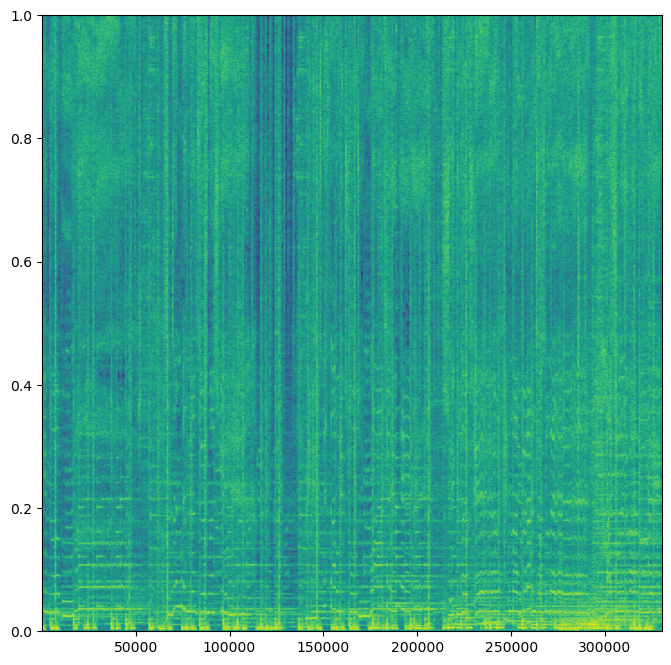

In [7]:
audio = "pop.00000.wav"
x, sr = librosa.load(audio, duration=30)
plt.figure(figsize=(8,8))
plt.specgram(x, NFFT=2048)
plt.show();

### Introduction to Feature Extraction  

Feature extraction is a very useful and important concept in machine learning and deep learning. It is the process of transforming raw data into numerical features, which can later be processed. This allows us to preserve the information in the original data and often yield better results than processing the raw data. 

There are many features to an audio signal. In order to build a meaningful model, we need to understand and extract the most relevant features to the problem we are solving. A few of the commonly used features are discussed below.

1. **Chroma Feature**

    Chroma feature represents the tonal content of an audio signal in a concise and robust form. It categorize pitches into categories (typically 12) and indicates how much energy of each category is is present in the signal. It is useful for descirbing how similar two ore more audio files are.

    We can use `librosa.feature.chroma_stft` to calculate chrome features of an audio signal.

In [21]:
# Calculate the chroma feature of an audio file
audio = "pop.00000.wav"
x, sr = librosa.load(audio, duration=30)
chroma_feature = librosa.feature.chroma_stft(y=x, sr=sr)
chroma_feature

array([[1.        , 1.        , 0.5475675 , ..., 0.13624758, 0.14827251,
        0.20359325],
       [0.9186912 , 0.8876004 , 0.5073457 , ..., 0.12147436, 0.20761484,
        0.4435379 ],
       [0.8719851 , 0.7307548 , 0.43602002, ..., 0.14754368, 0.24598967,
        0.7105745 ],
       ...,
       [0.8544748 , 0.4682189 , 0.29213658, ..., 0.03352364, 0.12011829,
        0.13096762],
       [0.88664985, 0.63019496, 0.34846717, ..., 0.02902374, 0.08035199,
        0.10764629],
       [0.9569393 , 0.86577237, 0.46665582, ..., 0.09435786, 0.1104938 ,
        0.09979388]], dtype=float32)

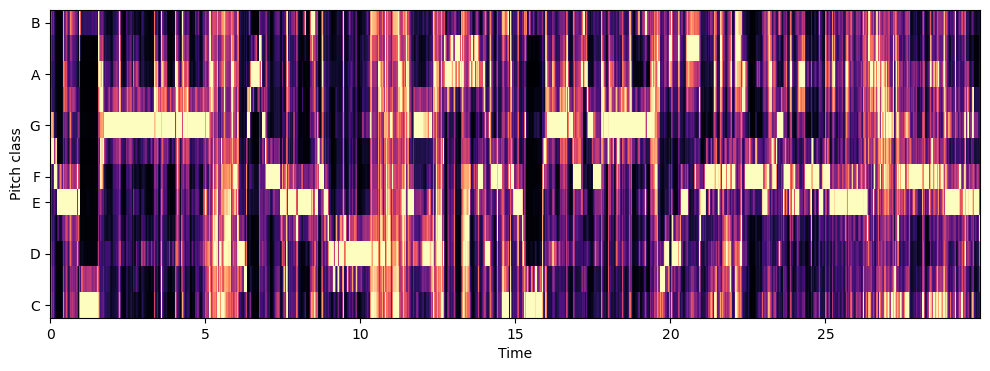

In [22]:
# Visualize chroma feature
plt.figure(figsize=(12, 4))
librosa.display.specshow(chroma_feature, x_axis='time', y_axis='chroma')
plt.show();

2. **Spectral Centroid**

    Spectral centroid is a measure of spectral position and shape. It indicates the center of "gravity" of the spectrum. A higher value of spectral centroid means that more energy of the signal is concentrated within higher frequencies and vice versa. 

    We can use `librosa.feature.spectral_centroid` to calculate spectral centroid for each frame in a signal, as shown below:

In [23]:
# Calculate the spectral centroid of an audio file
audio = "pop.00000.wav"
x, sr = librosa.load(audio, duration=30)
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)
spectral_centroids

array([[1812.46195284, 2913.45501624, 2870.22138738, ..., 3433.83586686,
        3366.68779896, 3551.25601878]])

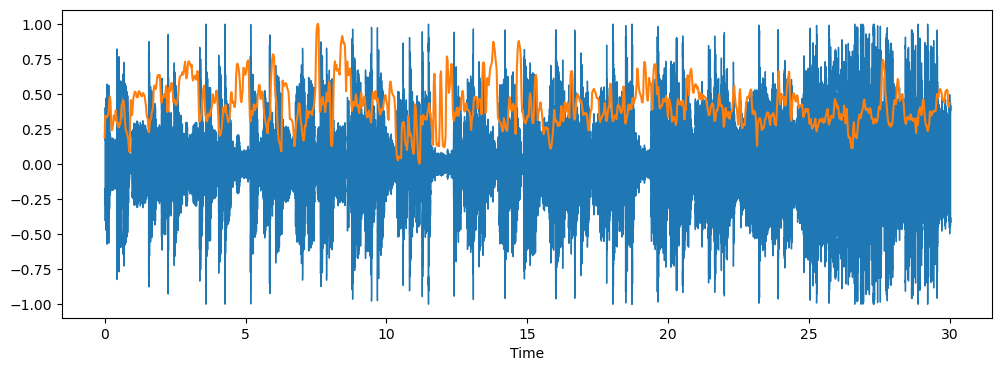

In [24]:
# Visualize spectral centroid

# Compute the time as the x-axis for all of the following visualizations
time = librosa.frames_to_time(range(len(spectral_centroids[0])))

# Normalize function for all of the following visualizations
def normalize(x):
  return sklearn.preprocessing.minmax_scale(x)

# Plot the spectral centroid 
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y=x, sr=sr)
plt.plot(time, normalize(spectral_centroids[0]))
plt.show();

3. **Spectral Rolloff**

    Spectral rolloff is a measure of signal shape. It indicates the frequency under which some percentage (default 85%) of the total energy of the spectrum is contained. It can be used to distinguish between harmonic (below roll-off) and noisy sounds (above roll-off).

    We can use `librosa.feture.spectral_rolloff` to calculate spectral rolloff for each frame in a signal, as shown below:

In [25]:
# Calculate the spectral rolloff of an audio file
audio = "pop.00000.wav"
x, sr = librosa.load(audio, duration=30)
spectral_rolloffs = librosa.feature.spectral_rolloff(y=x, sr=sr) 
spectral_rolloffs

array([[5415.60058594, 8247.21679688, 8118.01757812, ..., 8570.21484375,
        7428.95507812, 7644.28710938]])

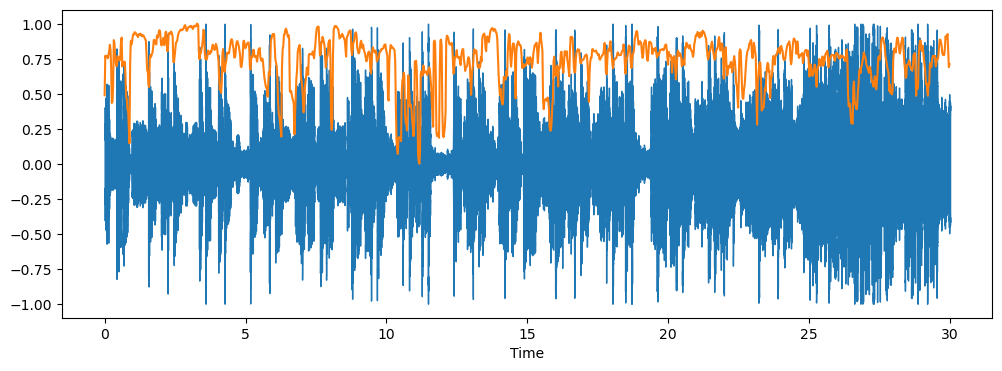

In [26]:
# Visualize the spectral rolloff 
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y=x, sr=sr)
plt.plot(time, normalize(spectral_rolloffs[0]))
plt.show();

4. **Spectral Bandwidth**

    Spectral bandwidth is the band width of light at one-half the peak maximum as shown in the picture. 
    
    <img src="spectral_bandwidth.png" width="600" height="600"/>

    We can use `librosa.feture.spectral_bandwidth` to calculate the p’th-order spectral bandwidth, as shown below:

In [27]:
# Calculate the spectral bandwidth of an audio file
audio = "pop.00000.wav"
x, sr = librosa.load(audio, duration=30)
spectral_bandwidths1 = librosa.feature.spectral_bandwidth(y=x, sr=sr, p=1)
spectral_bandwidths2 = librosa.feature.spectral_bandwidth(y=x, sr=sr, p=2)
spectral_bandwidths3 = librosa.feature.spectral_bandwidth(y=x, sr=sr, p=3)
spectral_bandwidths1, spectral_bandwidths2, spectral_bandwidths3

(array([[2401.2183183 , 3161.56169784, 2990.13385438, ..., 2990.93026522,
         2774.18823845, 2934.68791801]]),
 array([[3085.70023479, 3625.10817144, 3506.84310158, ..., 3512.03494932,
         3228.13182627, 3333.94449608]]),
 array([[3830.02348752, 4067.40965073, 3988.66878561, ..., 3948.75675186,
         3619.99086647, 3675.57645939]]))

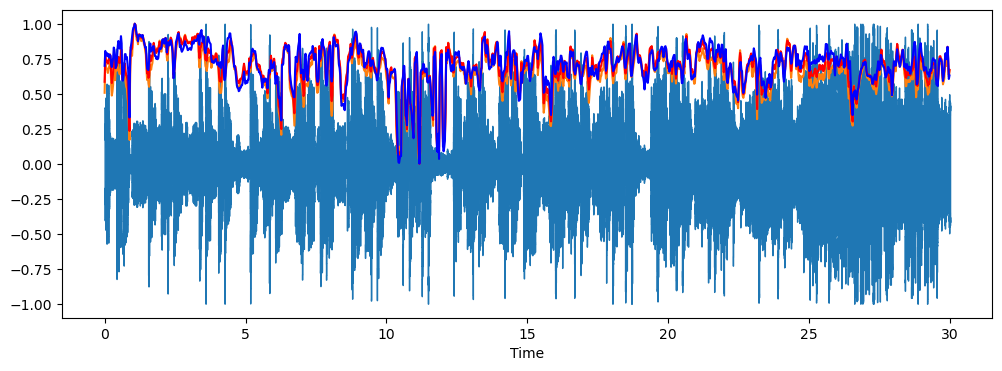

In [29]:
# Visualize the spectral centroid 
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y=x, sr=sr)
plt.plot(time, normalize(spectral_bandwidths1[0]))
plt.plot(time, normalize(spectral_bandwidths2[0]), color="r")
plt.plot(time, normalize(spectral_bandwidths3[0]), color="b")
plt.show();

5. **Zero Crossing Rate**

    Zero crossing rate is a measure of the smoothness of a signal. It is the rate at which a signal changes from positive to zero to negative or from negative to zero to positive. Higher zero crossing rate is often associated with more noisy sounds. 

    We can use `librosa.feature.zero_crossing_rate` compute the zero-crossing rate of an audio time series, as shown below.

In [31]:
# Calculate the zero crossing rate of an audio file
audio = "pop.00000.wav"
x, sr = librosa.load(audio, duration=30)
zero_crossing_rate = librosa.feature.zero_crossing_rate(y=x)
zero_crossing_rate

array([[0.00927734, 0.0234375 , 0.04541016, ..., 0.16259766, 0.14013672,
        0.09228516]])

6. **Mel-Frequency Cepstral Coefficients (MFCCs)**

The MFCCs is a small set of features, typically 10 to 20, that represent distinct units of sound as the shape of the vocal tract, which is responsible for sound generation. 

We can use `librosa.feature.mfcc` to calculate the MFCCs from a time series. 

In [33]:
# Calculate the zero crossing rate of an audio file
audio = "pop.00000.wav"
x, sr = librosa.load(audio, duration=30)
mfccs = librosa.feature.mfcc(y=x, sr=sr)
mfccs

array([[-195.25616   , -150.96812   , -132.99374   , ...,  -52.73639   ,
         -16.157654  ,  -17.049103  ],
       [  75.58827   ,   41.62012   ,   39.527184  , ...,   69.34447   ,
          60.148766  ,   57.83748   ],
       [  48.67988   ,   59.39933   ,   64.94699   , ...,   12.909161  ,
          18.977104  ,   32.600258  ],
       ...,
       [   8.377291  ,   13.291913  ,   24.476612  , ...,   -2.8301728 ,
          -0.20533174,    3.8409376 ],
       [  10.310976  ,   14.942486  ,   24.13816   , ...,    2.6228614 ,
           5.6157637 ,   10.093792  ],
       [   9.798388  ,   14.945286  ,   20.63348   , ...,   13.044418  ,
           5.956006  ,    7.254858  ]], dtype=float32)

/Users/emilyzhang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Pass y=[-0.0887146  -0.09524536 -0.10275269 ...  0.08453369  0.09436035
  0.28878784], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


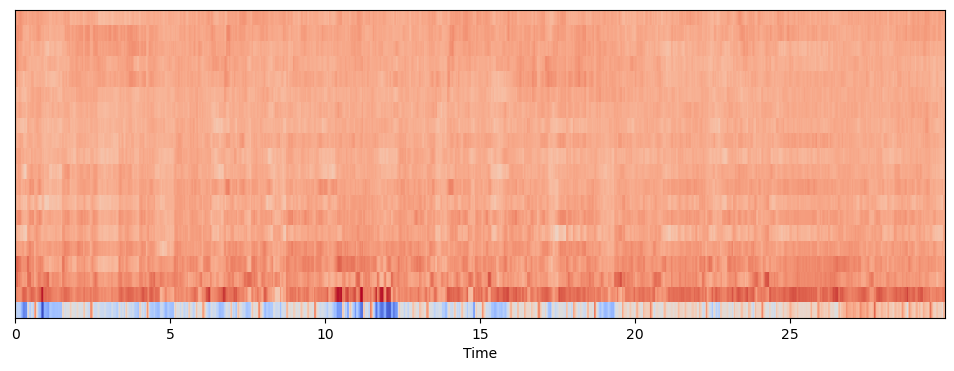

In [34]:
# Visualizing MFCCs
mfccs = librosa.feature.mfcc(x, sr)
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show();

Let's put all of these together through an example.

### Example: Music Genre Classification Using an Artifical Neural Network Model

Now we know what spectrogram and feature extraction is. Let's build an Artifical Neural Network (ANN) model for music genre classification. In machine learning, classfication is a program that learns from a given dataset/observation and classifies a new dataset/observation into a number of classes or groups. In this example, we will try to build a model that predicts the genre of a given audio file excerpt. The dataset we are using is a ballroom music dataset with 8 different genres, including ChaChaCha, Jive, QuickStep, Rumba, Samba, Tango, Viennese Waltz, and Waltz. There are a total of 698 different excerpts and each is 30 second. However, due to the dataset's big size, I only used a portion (192 excerpts) for the analysis.

A general roadmap is as follows:

1. Prepare the a CSV file with appropriate header.
2. Peform feature extration. 6 features we want to extract include chroma feature, spectral centroid, spectral rolloff, spectral bandwidth, zero crossing rate, and mfccs. 
3. Load the extracted features to the CSV file.
4. Process the data and split it into train and test sets.
5. Build and fit an ANN model. 

Let's begin by running the cell below to construct a header with the filename, all the features to be extracted, and the corresponding genre label and write it to the CSV file.

In [35]:
# construct header
header = ["filename", "chroma_feature", "spectral_centroid", "spectral_bandwidth", "rolloff", "zero_crossing_rate"]

for i in range(1, 21): # we want construct 20 mfcc sets 
    header.append(f' mfcc{i}')
header.append("label")

# write header to the file
with open("features.csv", "w", newline='') as file:
  csv.writer(file).writerow(header)

After loading in the appropriate header, we will write a helper function `extract_features` that extracts the six features we want to include (mentioned in the roadmap) of a given filename and genre and write them to `features.csv`. Run the below cell to do so.

In [36]:
def extract_features(filename, genre):
  audio = f"./{genre}/{filename}"
  x, sr = librosa.load(audio, duration=10) # load the entire 10 seconds of the audio file

  chroma_feature = librosa.feature.chroma_stft(y=x, sr=sr)
  spectral_centroid = librosa.feature.spectral_centroid(y=x, sr=sr)
  spectral_bandwidth = librosa.feature.spectral_bandwidth(y=x, sr=sr)
  spectral_rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
  zero_crossing_rate = librosa.feature.zero_crossing_rate(y=x)
  
  # calculate the mean value for each feature array and add it to the new row
  row = [f, np.mean(chroma_feature), np.mean(spectral_centroid), np.mean(spectral_bandwidth), np.mean(spectral_rolloff), np.mean(zero_crossing_rate)]    
  
  mfccs = librosa.feature.mfcc(y=x, sr=sr)

  # calculate the mean value for all mfcc values and append it to the new row
  for mfcc in mfccs:
      row.append(np.mean(mfcc))
  row.append(genre)

  # write it to the csv file
  file = open('features.csv', 'a', newline='')
  with file:
    writer = csv.writer(file)
    writer.writerow(row)

Now, we can loop through each file in every genre and call `extract_features` to extract and load all six features into `features.csv`. Note that it might take a few minutes to run.

In [42]:
genres = ["ChaChaCha", "Jive", "QuickStep", "Rumba", "Samba", "Tango", "VienneseWaltz", "Waltz"]

for g in genres:
  folder = f'{g}/'
  for f in os.listdir(folder):
    if not f.startswith('.'): # make sure it's not a hidden file
      extract_features(f,g)

Now, it's time to process the data. We will first convert the genre label to numeric values. Then, we will split the data to train and test set using the `train_test_split` method from sklearn.

In [63]:
# converts each genre to a numeric value
def convert(x):
  conversion = {"ChaChaCha": 0, "Jive": 1, "QuickStep": 2, "Rumba": 3, "Samba": 4, "Tango": 5, "VienneseWaltz": 6, "Waltz": 7}
  return conversion[x]

df = pd.read_csv('features.csv')
df = df.drop(['filename'],axis=1) # drop unnecessary column as it's not relevant to the prediction

X = df.iloc[:, :-1].to_numpy()
df["label"] = df["label"].apply(convert)
y = df["label"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80-20 split
X_val = X_train[:100]
X_train = X_train[100:]
y_val = y_train[:100]
y_train = y_train[100:]

Now, we have all the information to build an ANN model. In the keras library, there are many optimizers for training a model. We will explore three of the most common optimizers and compare their accuracy. Let's start by creating a helper function `train_model` that trains and fits a model to the train set with a given optimizer. 

In [72]:
def train_model(model, optimizer):
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val)) #test on the validation sets

Now we will build three different models using three different optimizers - `adam`, `sgd`, and `rmsprop`. The built in functions in keras allow us to do so very easily. However, we won't go too deep into how to create a model and what the optimizers are since it's not the focus of this tutorial and it can seem overwhelming. Instead, we will focus on how to train the models and visualize their performance. Run the cell below to build and train the models.

In [78]:
model = tf.keras.Sequential(
  [ tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') ] )

optimizers = ["adam", "sgd", 'rmsprop']
classifiers = [] # store in an array for plotting purposes 

for o in optimizers:
  classifiers.append(train_model(model, o))

Train on 153 samples, validate on 100 samples
Epoch 1/100
153/153 [==============================] - 1s 6ms/sample - loss: 243.6762 - accuracy: 0.1176 - val_loss: 183.2308 - val_accuracy: 0.0900
Epoch 2/100
153/153 [==============================] - 0s 430us/sample - loss: 168.8597 - accuracy: 0.1373 - val_loss: 128.3583 - val_accuracy: 0.1100
Epoch 3/100
153/153 [==============================] - 0s 494us/sample - loss: 116.3078 - accuracy: 0.1111 - val_loss: 151.0959 - val_accuracy: 0.1400
Epoch 4/100
153/153 [==============================] - 0s 520us/sample - loss: 150.4555 - accuracy: 0.1046 - val_loss: 106.4981 - val_accuracy: 0.1300
Epoch 5/100
153/153 [==============================] - 0s 487us/sample - loss: 105.7028 - accuracy: 0.1111 - val_loss: 95.6593 - val_accuracy: 0.1400
Epoch 6/100
153/153 [==============================] - 0s 466us/sample - loss: 95.9512 - accuracy: 0.1699 - val_loss: 79.9084 - val_accuracy: 0.1200
Epoch 7/100
153/153 [==============================] 

Now, we have trained our three models, let's visualize each of their performances. Run the cell below to plot an accuracy graph for each model. 

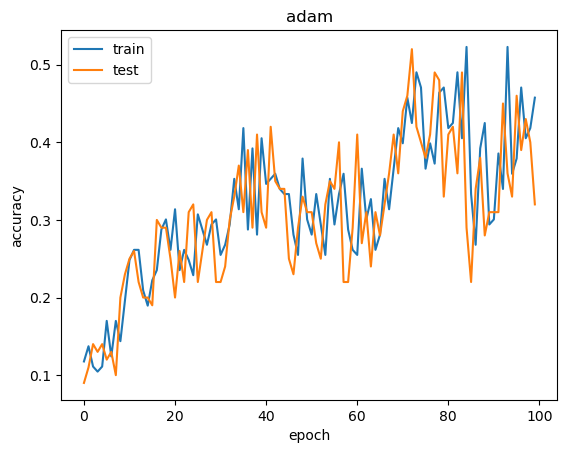

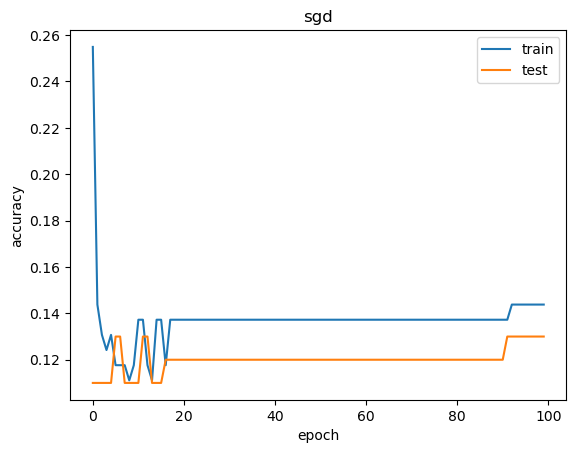

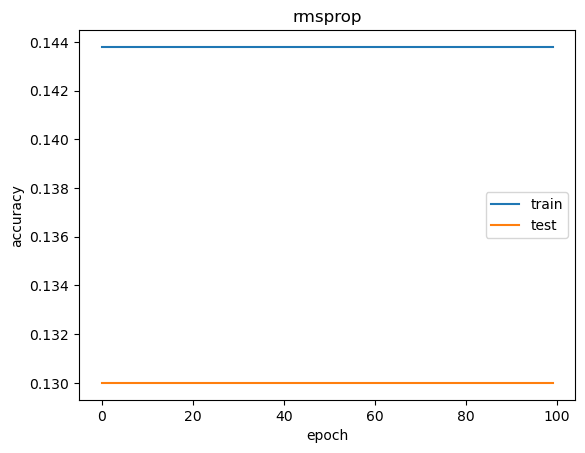

In [81]:
i = 0
for c in classifiers:
  plt.plot(c.history["accuracy"])
  plt.plot(c.history["val_accuracy"])
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(["train", "test"])
  plt.title(optimizers[i])
  i += 1
  plt.show();

As you can see, adam optimizer yielded a model with the best performance. We can also note that the other two did not give expected results, like constant accuracy across epochs, steep decline in accuracy. This might suggest that the other two optimizers are not suitable for our analysis. 

### Conclusion and References

This tutorial introduced the basic concepts of audio data and how to build a ANN model for music genre classification. The following links include the documentations for the libraries used.

* librosa (https://librosa.org/doc/main/index.html)
* keras (https://keras.io/api/)
* matplotlib (https://matplotlib.org/stable/index.html)